<a href="https://colab.research.google.com/github/Sonukumari97/Machine-Learning-Algorithms/blob/main/NLP_With_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import pathlib 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
% matplotlib inline
sns.set()

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonukumari47","key":"54f279af05020cde7a218048dcd94587"}'}

In [ ]:
# setting environment for kaggle 
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 58.9MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 20.8MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 57.1MB/s]


In [ ]:
df1 = pd.read_csv("train.csv")
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df2 = pd.read_csv("test.csv")
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print(f"Shape of train DataSet {df1.shape}")
print(f"Shape of test DataSet {df2.shape}")

Shape of train DataSet (7613, 5)
Shape of test DataSet (3263, 4)


In [ ]:
print(f"Null Value in Train Dataset \n {df1.isna().sum()} ")
print("\n")
print(f"Null Value in Test Dataset \n {df2.isna().sum()} ")

Null Value in Train Dataset 
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64 


Null Value in Test Dataset 
 id             0
keyword       26
location    1105
text           0
dtype: int64 


In [ ]:
print(df1["id"].nunique()) # id unique is equal to shape so don't worry about this
print(df1["keyword"].nunique()) # this is important as some nan persent in this column 
print(df1["location"].nunique()) # this has also something as sone nan value persent in this column 
print(df1["target"].unique()) # 2 value which is 0 and 1 is our target 

7613
221
3341
[1 0]


# Data Preprocessing 

In [ ]:
# getting most frequently comming latter 

# IN TRAIN DATASET 
df1_key = df1["keyword"].value_counts().index[0]
df1_loc = df1["location"].value_counts().index[0]
print(f"most frequently comming keyword in train data is :  '{df1_key}' ")
print(f"most frequently comming location in train data is:   '{df1_loc}' ")

# IN TEST DATASET 
df2_key = df2["keyword"].value_counts().index[0]
df2_loc = df2["location"].value_counts().index[0]
print(f"most frequently comming keyword in test data is :  '{df2_key}' ")
print(f"most frequently comming location in test data is :  '{df2_loc}' ")


most frequently comming keyword in train data is :  'fatalities' 
most frequently comming location in train data is:   'USA' 
most frequently comming keyword in test data is :  'deluged' 
most frequently comming location in test data is :  'New York' 


In [ ]:
# Filling Missing Values by Most Frequent Value 

# IN TRAIN DATASET
df1['keyword'] = df1['keyword'].fillna(df1['keyword'].value_counts().idxmax())
df1['location'] = df1['location'].fillna(df1['location'].value_counts().idxmax())

# IN TEST DATASET 
df2['keyword'] = df2['keyword'].fillna(df2['keyword'].value_counts().idxmax())
df2['location'] = df2['location'].fillna(df2['location'].value_counts().idxmax())

In [ ]:
df1['keyword'].unique()

array(['fatalities', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'dera

In [ ]:
df2.head()

,id,keyword,location,text
0,0,deluged,New York,Just happened a terrible car crash
1,2,deluged,New York,"Heard about #earthquake is different cities, s..."
2,3,deluged,New York,"there is a forest fire at spot pond, geese are..."
3,9,deluged,New York,Apocalypse lighting. #Spokane #wildfires
4,11,deluged,New York,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print(f"Null Value in Train Dataset \n {df1.isna().sum()} ")
print("\n")
print(f"Null Value in Test Dataset \n {df2.isna().sum()} ")

Null Value in Train Dataset 
 id          0
keyword     0
location    0
text        0
target      0
dtype: int64 


Null Value in Test Dataset 
 id          0
keyword     0
location    0
text        0
dtype: int64 


In [ ]:
# Filling Missing Values by Mean Value 

# # IN TRAIN DATASET
# df1['keyword'] = df1['keyword'].fillna(df1['keyword'].mean())
# df1['location'] = df1['location'].fillna(df1['location'].mean())

# # IN TEST DATASET 
# df2['keyword'] = df2['keyword'].fillna(df2['keyword'].mean())
# df2['location'] = df2['location'].fillna(df2['location'].mean())

In [ ]:
# Filling Missing Values by Median

# IN TRAIN DATASET
# df1['keyword'] = df1['keyword'].fillna(df1['keyword'].median())
# df1['location'] = df1['location'].fillna(df1['location'].median())

# IN TEST DATASET 
# df2['keyword'] = df2['keyword'].fillna(df2['keyword'].median())
# df2['location'] = df2['location'].fillna(df2['location'].median())

In [ ]:
# Filling Missing Values by previous value - Forward fill

# IN TRAIN DATASET
# df1['keyword'] = df1['keyword'].fillna(method='ffill')
# df1['location'] = df1['location'].fillna(method='ffill')

# IN TEST DATASET 
# df2['keyword'] = df2['keyword'].fillna(method='ffill')
# df2['location'] = df2['location'].fillna(method='ffill')

In [ ]:
# Filling Missing Values by Interpolation

# IN TRAIN DATASET
# df1['keyword'] = df1['keyword'].interpolate()
# df1['location'] = df1['location'].interpolate()

# IN TEST DATASET 
# df2['keyword'] = df2['keyword'].interpolate()
# df2['location'] = df2['location'].interpolate()

# TEXT PRE-PROCESSING

In [ ]:
# Seeing What is Oue Text Containing Randomly 

print(f"keyword at index 0 : '{df1['keyword'][0]}' and text is : '{df1['text'][0]}' \n " ) # text with Hashtag with important word 
print(f"keyword at index 10 : '{df1['keyword'][10]}' and text is : '{df1['text'][10]}' \n " ) # text without any special charcater 
print(f"keyword at index 2002 : '{df1['keyword'][2002]}' and text is : '{df1['text'][2002]}' \n " )
print(f"keyword at index 100 : '{df1['keyword'][100]}' and text is : '{df1['text'][100]}' \n " )
print(f"keyword at index 500 : '{df1['keyword'][500]}' and text is : '{df1['text'][500]}' \n " )
print(f"keyword at index 1000 : '{df1['keyword'][1000]}' and text is : '{df1['text'][1000]}' \n " ) # text with Hashtag and link 
print(f"keyword at index 5000 : '{df1['keyword'][5000]}' and text is : '{df1['text'][5000]}' \n " ) # text with link
print(f"keyword at index 7000 : '{df1['keyword'][7000]}' and text is : '{df1['text'][7000]}' \n " ) # text with link 

keyword at index 0 : 'fatalities' and text is : 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all' 
 
keyword at index 10 : 'fatalities' and text is : 'Three people died from the heat wave so far' 
 
keyword at index 2002 : 'damage' and text is : '@JoeDawg42 TOR for a TOR situation only. Wind damage enhanced wording is key IMO' 
 
keyword at index 100 : 'accident' and text is : '.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad' 
 
keyword at index 500 : 'attacked' and text is : 'Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/LHBZHWq4B9' 
 
keyword at index 1000 : 'body%20bagging' and text is : '#OVOFest Drake straight body bagging Meek on that OVO stage. #ZIPHIMUP!' 
 
keyword at index 5000 : 'military' and text is : '13 reasons why we love women in the military   - lulgzimbestpicts http://t.co/IAPvTqxLht http://t.co/WAMKRe6CK

# Word Embedding 
**Getting Sentiment from text Well, that's something that can be learned from a corpus of words in much the same way as features were extracted from images. This process is called embedding***

**the idea being that words and associated words are clustered as vectors in a multi-dimensional space.**

 Like,here the disaster are in two main categories; positive and negative. So together with the labels, TensorFlow was able to build these embeddings showing a clear clustering of words that are distinct to both of these review types, for example, if we see for accident, we can see that it lights up in one of the clusters and that associated words were clearly positive  such as millitary. Similarly, if we see for a negative word like fatalities, we'll find it along with damage in the cluster that's clearly the negative i.e. Disaster tweet. 

 **the vectors for each word with their associated sentiment.**

In [ ]:
# Adding Keyword and Text because both are important for our prediction 

# IN TRAIN DATASET
df1["sentence"] = df1['keyword'] + " " + df1['text']
train_text = np.array(df1["sentence"])
y = np.array(df1['target'])
print(train_text[0])
print(f" target type : '{type(y)}' ")
print(f" train_text type : '{type(train_text)}' ")

# IN TEST DATASET 
df2["sentence"] = df2['keyword'] + " " + df2['text']
test_text = np.array(df2["sentence"])
print(test_text[0])

fatalities Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
 target type : '<class 'numpy.ndarray'>' 
 train_text type : '<class 'numpy.ndarray'>' 
deluged Just happened a terrible car crash


In [ ]:
df1.head(2)

,id,keyword,location,text,target,sentence
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,fatalities Our Deeds are the Reason of this #e...
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,fatalities Forest fire near La Ronge Sask. Canada


In [ ]:
df2.head(2)

,id,keyword,location,text,sentence
0,0,deluged,New York,Just happened a terrible car crash,deluged Just happened a terrible car crash
1,2,deluged,New York,"Heard about #earthquake is different cities, s...",deluged Heard about #earthquake is different c...


In [ ]:
# split into train test sets
X_train, X_valid, y_train, y_valid = train_test_split(train_text, y, test_size=0.33,random_state = 0)
print(f" X_train shape {X_train.shape}")
print(f" X_test shape {X_valid.shape}")
print(f" y_train shape {y_train.shape}")
print(f" y_test shape {y_valid.shape}")

 X_train shape (5100,)
 X_test shape (2513,)
 y_train shape (5100,)
 y_test shape (2513,)


In [ ]:
# Tokenzier Parameter
vocab_size = 10000
embedding_dim = 20
max_length = 120
trunc_type='post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# FOR TRAIN DATA
tokenizer.fit_on_texts(X_train) 
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# FOR VALID DATA 
testing_sequences = tokenizer.texts_to_sequences(X_valid)
X_valid_padded = pad_sequences(testing_sequences,maxlen=max_length)

# FOR TEST DATA 
# tokenizer_test = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# tokenizer_test.fit_on_texts(test_text)
X_testing_sequences = tokenizer.texts_to_sequences(test_text)
X_test_padded = pad_sequences(X_testing_sequences,maxlen=max_length)

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(X_train_padded[0]))
print(X_train[0])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? derailed bobbyofhomewood joxroundtable as in dropping the no sports show i don't think si top25 would have derailed that
derailed @BobbyofHomewood @JOXRoundtable as in dropping the No-Sports show? I don't think SI Top25 would have derailed that.


#### seen above that @ , # are removed from padded sequences

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 20)           200000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 200,529
Trainable params: 200,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_valid_padded, y_valid), verbose = 2)

Epoch 1/10
160/160 - 1s - loss: 0.6846 - accuracy: 0.5635 - val_loss: 0.6749 - val_accuracy: 0.5842
Epoch 2/10
160/160 - 1s - loss: 0.6722 - accuracy: 0.5671 - val_loss: 0.6526 - val_accuracy: 0.6236
Epoch 3/10
160/160 - 1s - loss: 0.6153 - accuracy: 0.6765 - val_loss: 0.5670 - val_accuracy: 0.7505
Epoch 4/10
160/160 - 1s - loss: 0.5130 - accuracy: 0.7931 - val_loss: 0.4964 - val_accuracy: 0.7939
Epoch 5/10
160/160 - 1s - loss: 0.4227 - accuracy: 0.8361 - val_loss: 0.4611 - val_accuracy: 0.8046
Epoch 6/10
160/160 - 1s - loss: 0.3625 - accuracy: 0.8645 - val_loss: 0.4538 - val_accuracy: 0.8038
Epoch 7/10
160/160 - 1s - loss: 0.3196 - accuracy: 0.8798 - val_loss: 0.4358 - val_accuracy: 0.8122
Epoch 8/10
160/160 - 1s - loss: 0.2904 - accuracy: 0.8867 - val_loss: 0.4370 - val_accuracy: 0.8138
Epoch 9/10
160/160 - 1s - loss: 0.2637 - accuracy: 0.9018 - val_loss: 0.4425 - val_accuracy: 0.8138
Epoch 10/10
160/160 - 1s - loss: 0.2414 - accuracy: 0.9094 - val_loss: 0.4463 - val_accuracy: 0.8185

Text(0.5, 1.0, 'Training-Validation Accuracy')

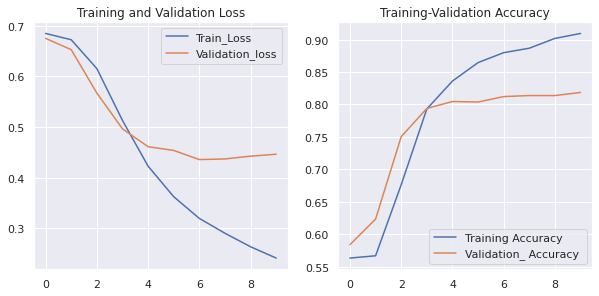

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Train_Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

# Clear Example of Over-Fitting

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)
# here 10,000 of words in corpus and they are in 20 dimension

(1000, 20)


# **NEW MODEL** ------->**LSTM**